<h1> Forbes Stock Market Time series Analysis </h1>


In [ ]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings("ignore")
df = pd.read_csv(r'A.csv', parse_dates = True)


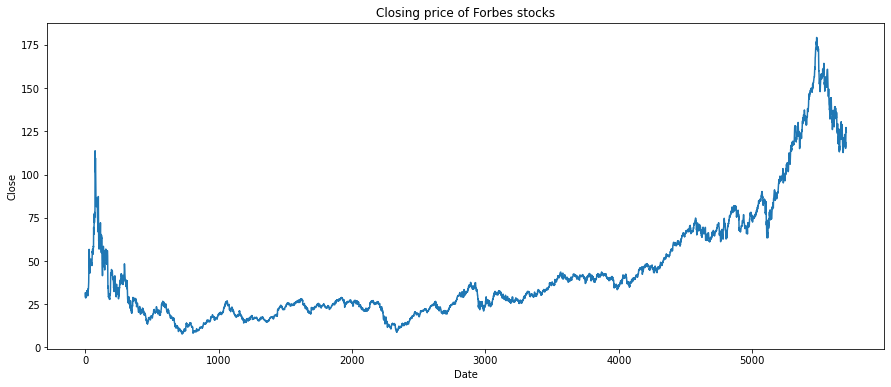

In [5]:
df["Close"].plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Closing price of Forbes stocks") 
plt.show()

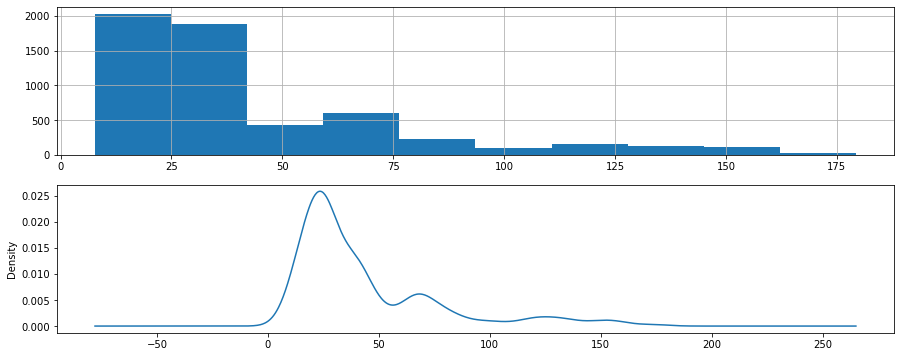

In [4]:
plt.figure(1, figsize=(15,6)) 
plt.subplot(211) 
df["Close"].hist() 
plt.subplot(212) 
df["Close"].plot(kind='kde') 
plt.show()

In [9]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
        def mean_absolute_percentage_error(y_true, y_pred):       
            y_true, y_pred = np.array(y_true), np.array(y_pred)        
            return np.mean(np.abs((y_true - y_pred) / y_true)) * 100    
        print('Evaluation metric results:-')    
        print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')    
        print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
        print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
        print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
        print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
        

In [11]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic', 'p-value','No Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():      
        dfoutput['Critical Value (%s)'%key] = value     
        print (dfoutput)    
        if dftest[1] <= 0.05:      
            print("Conclusion:====>")       
            print("Reject the null hypothesis")        
            print("Data is stationary")   
        else:       
            print("Conclusion:====>")        
            print("Fail to reject the null hypothesis")         
            print("Data is non-stationary")
    

In [12]:
X = df[['Close' ]]
train, test = X[0:-30], X[-30:]


In [13]:
stepwise_model = auto_arima(train,start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,    d=None, trace=True,error_action='ignore',suppress_warnings=True,stepwise = True)
stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18744.918, Time=1.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18746.506, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18743.358, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18743.499, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18745.457, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=18744.352, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18743.518, Time=3.48 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=18742.370, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=18743.336, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=18743.923, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=18742.512, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=18741.418, Time=1.11 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=18738.418, Time=1.43 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=18744.403, Time=0.30 sec
 ARIMA(4,1,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5676
Model:               SARIMAX(7, 1, 4)   Log Likelihood               -9311.589
Date:                Thu, 28 Jul 2022   AIC                          18647.179
Time:                        17:01:48   BIC                          18726.905
Sample:                             0   HQIC                         18674.943
                               - 5676                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0177      0.025      0.697      0.486      -0.032       0.068
ar.L2          0.8760      0.025     34.940      0.000       0.827       0.925
ar.L3          0.1276      0.024      5.421      0.000       0.081       0.174
ar.L4         -0.7634      0.022    -34.956      0.000      -0.806      -0.721
ar.L5         -0.1054      0.007    -14.579      0.000      -0.120      -0.091
ar.L6         -0.0127      0.006     -1.972      0.049      -0.025   -7.64e-05
ar.L7          0.0775      0.008      9.814      0.000       0.062       0.093
ma.L1         -0.0534      0.026     -2.047      0.041      -0.105      -0.002
ma.L2         -0.8664      0.026    -33.955      0.000      -0.916      -0.816
ma.L3         -0.0847      0.023     -3.715      0.000      -0.129      -0.040
ma.L4          0.7307      0.022     33.098      0.000       0.687       0.774
sigma2         1.5587      0.006    272.306      0.000       1.547       1.570
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):           4293414.57
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             3.69
Prob(H) (two-sided):                  0.00   Kurtosis:                       137.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
forecast,conf_int = stepwise_model.predict(n_periods=30, return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['close_pred'])
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound', 'Lower_bound'])
df_conf["new_index"] = range(1229, 1259)
df_conf = df_conf.set_index("new_index")
timeseries_evaluation_metrics_func(test, forecast)

Evaluation metric results:-
MSE is : 39.53216568750452
MSE is : 5.4922799786396865
RMSE is : 6.287460988944943
MAPE is : 4.688053818139782
R2 is : -2.298790472119263



In [17]:
forecast["new_index"] = range(1229, 1259) 
forecast = forecast.set_index("new_index")

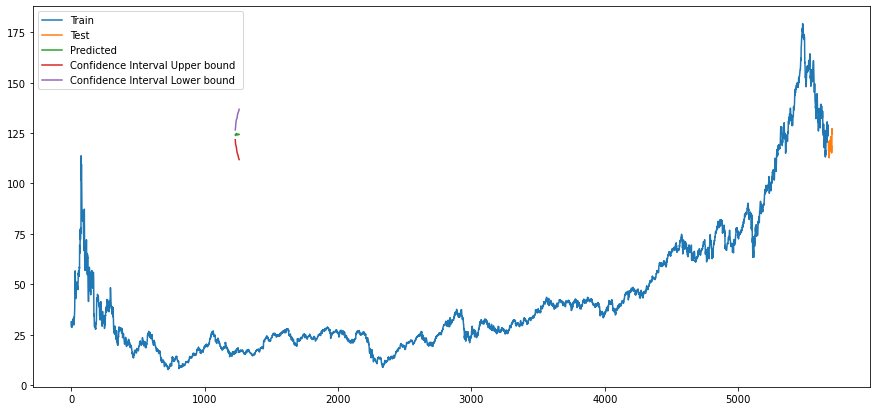

In [19]:
import matplotlib.pyplot as plt 
get_ipython().run_line_magic('matplotlib', 'inline') 
plt.rcParams["figure.figsize"] = [15,7]
plt.plot( train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label='Predicted ') 
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()

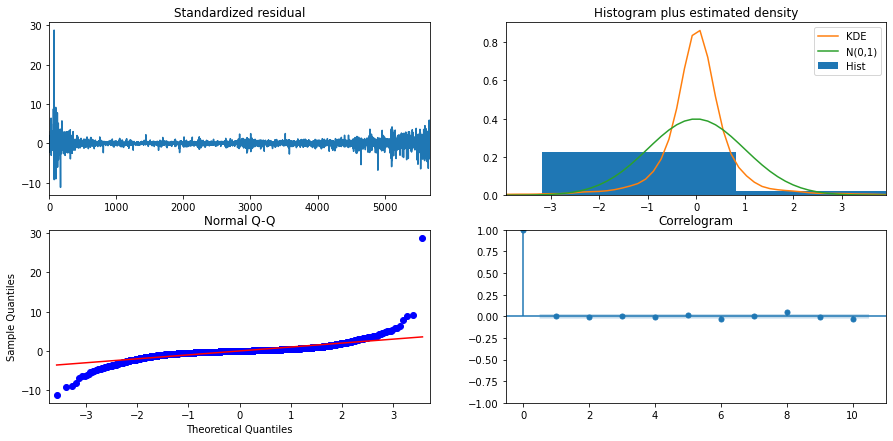

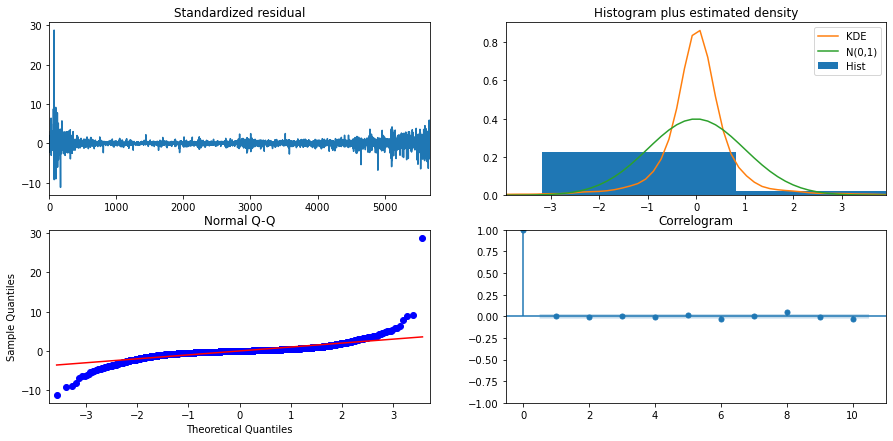

In [21]:
stepwise_model.plot_diagnostics()